In [1]:
import os
import random

import cv2
import gorillatracker.scripts.segment_dataset as segment_dataset
import gorillatracker.utils.cutout_helpers as cutout_helpers
from matplotlib import pyplot as plt

full_image_path = "/workspaces/gorillatracker/data/ground_truth/cxl/full_images"
body_dir = "/workspaces/gorillatracker/data/derived_data/cxl/yolov8n_gorillabody_ybyh495y/body_images"

/opt/conda/envs/research/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


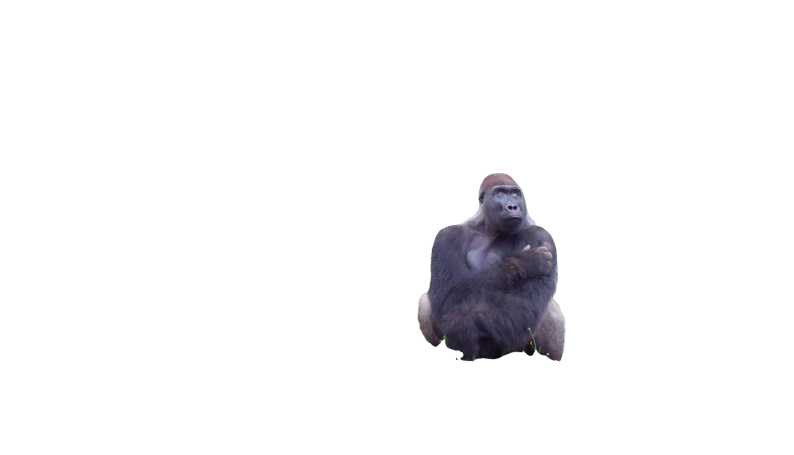

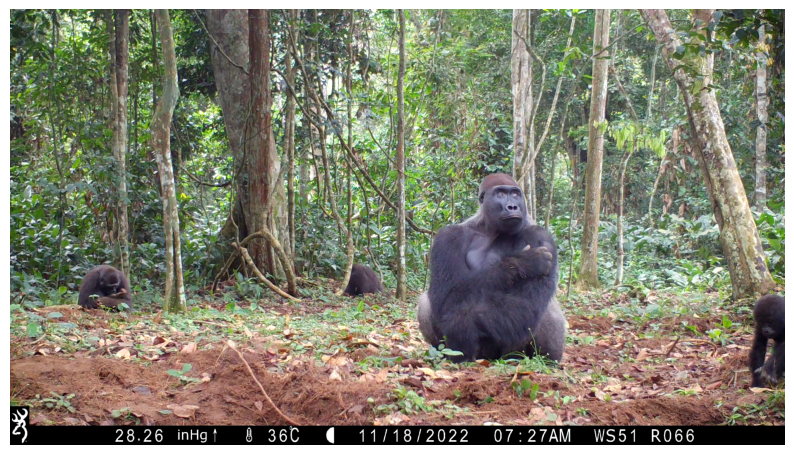

In [12]:
image = random.choice(os.listdir(full_image_path))
full_image = cv2.imread(os.path.join(full_image_path, image))
body_image = cv2.imread(os.path.join(body_dir, image))
bbox = cutout_helpers.get_cutout_bbox(full_image, body_image)

full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)

segmented_body = segment_dataset.segment_image(full_image, bbox)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(segmented_body)
plt.show()
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(full_image)
plt.show()